In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
BASE_PATH = "/opt/nilm-shared-data/nilm_device_detection/VNDALE_v2"

In [2]:
csv_files = [f for f in os.listdir(f"{BASE_PATH}/raw_data") if f.endswith('.csv')]

In [3]:
def plot_time_series(column_name, df, label, start = 0, end = None):
    plt.figure(figsize=(10, 5))
    plt.plot(df[column_name][start:end], label=f'{label} - {column_name}')
    plt.ylabel(column_name)
    plt.title(f'{label}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [4]:
fix_csv_files = [f for f in os.listdir(f"{BASE_PATH}/fix_raw_data") if f.endswith('.csv')]
len(fix_csv_files)

256

# Notes
- Kiểm tra 236 - 234, có thể cùng 1 file

Processing raw data:  led_mayep_maysay_sacdt.csv 136644
Saving fixed raw data to csv file:  led_mayep_maysay_sacdt.csv 136644 136644


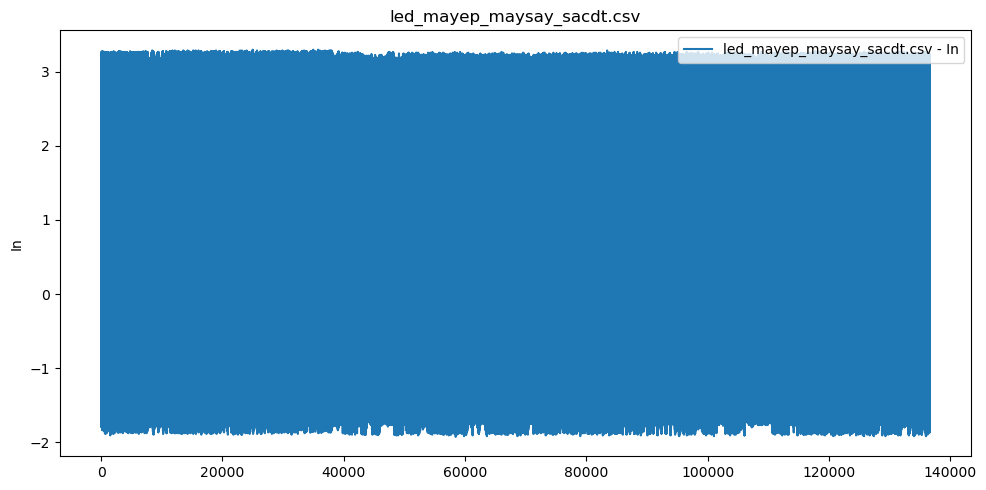

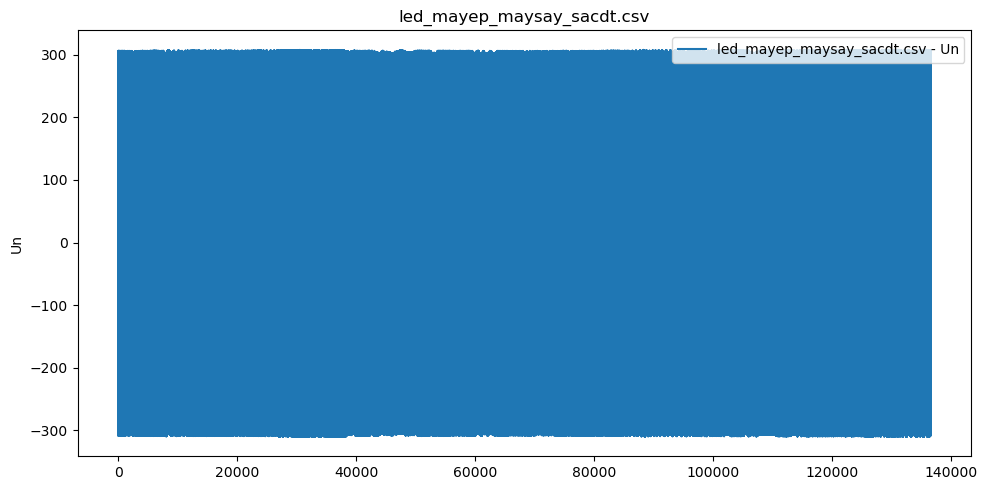

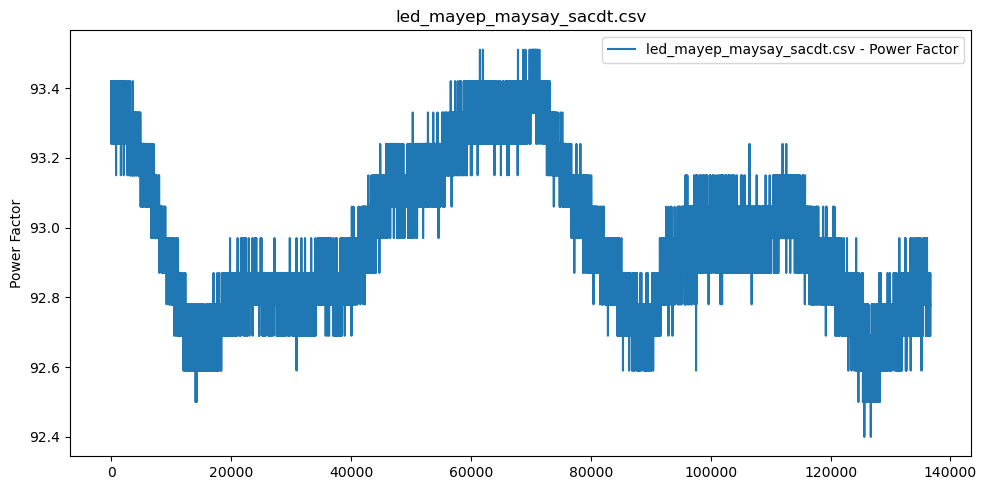

In [5]:
csv_file = csv_files[100]
start, end = 0, None

df = pd.read_csv(f"{BASE_PATH}/raw_data/{csv_file}")
print("Processing raw data: ", csv_file, len(df))
fix_raw_df = df.copy()

# Fix raw data
fix_raw_df = fix_raw_df.copy()[start:end]

fix_raw_df = fix_raw_df[(fix_raw_df['Un'] >= -400) & (fix_raw_df['Un'] <= 400)]
# fix_raw_df = fix_raw_df[(fix_raw_df['Power Factor'] >= 97) & (fix_raw_df['Power Factor'] <= 99)]
# fix_raw_df = fix_raw_df[(fix_raw_df['Power Factor'] >= 70)]
# fix_raw_df = fix_raw_df[(fix_raw_df['In'] != 0)]
# fix_raw_df = fix_raw_df.drop(fix_raw_df.index[95000:97500])
fix_raw_df = fix_raw_df.reset_index(drop=True)
# Plot
print("Saving fixed raw data to csv file: ", csv_file, len(df), len(fix_raw_df))
plot_time_series('In', fix_raw_df, csv_file)
plot_time_series('Un', fix_raw_df, csv_file)
plot_time_series('Power Factor', fix_raw_df, csv_file)
fix_raw_df.to_csv(f"{BASE_PATH}/fix_raw_data/{csv_file}", index=False)